# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [154,75,181]

# print data.idxmax(axis=0)
# print data.idxmin(axis=0)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,622,55,137,75,7,8
1,20398,1137,3,4407,3,975
2,112151,29627,18148,16745,4948,8550


#### Comparing each of the samples expenditures to the statistical description of the data 

* Each of the samples is normalised by comparing it below against the mean expenditure. Each value represents its deviation from a mean of zero.
* We can see that sample 2 has spend across the categories that is greater than the mean, often significantly so. Samples 0 and 1 have spend that differs from the mean, but in different categories from each other. 
* This means they could represent three interesting samples to track throughout this project. 

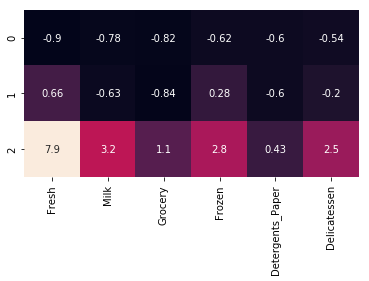

In [11]:
import seaborn as sns

sns.heatmap((samples-data.mean())/data.std(ddof=0), annot=True, cbar=False, square=True)

## Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
* We can conceive that a lot of different establishments will use a food wholesaler. 
* *Sample 0* spend is less across all the product categories, in some categories significantly so. We can see this when we compare the values to the mean of each category. We can also see that spend is below the 25% quartile figure in all categories. Given this, we can guess that *sample 0* could represent a small retailer or market, as there is spend in most categories (suggesting that it provides its customers with a broader range of products) at a low level compared to the rest of the data population. 
* Spend across the categories for *sample 1* also differs from the mean data values, but in different ways. There is over half a standard deviation more spend in the 'Fresh' category, and over the 75% percentile; but a similar standard deviation *less* in 'Milk', 'Grocery' and 'Detergents_Paper', and under the 25% percentile. *Sample 1* could represent a medium-sized cafe (or chain of a few cafes), given the spend on Fresh, Frozen and Delicatessen items. Limited Detergents_Paper spend suggests that this caregory is consumed by the customer and not sold on to another customer as part of its own operations. 
* *Sample 2* has higher spend across all product categories than the mean data, sometimes significantly so. 'Fresh' is nearly 8 standard deviations higher than the mean, and indeed it appears our sample contains the max value. In all the other categories, the values are above the 75% percentile. This suggests that *sample 2* is a large supermarket/grocery store. Spend is high across the categories, suggesting a store (or stores) that have a wide range of goods on display. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Fresh', axis=1)
fresh_data = data['Fresh']
'''
print "new_data dataset has {} samples with {} features each.".format(*new_data.shape)
print fresh_data.shape
'''

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, 
                                                    fresh_data, 
                                                    test_size=0.25, 
                                                    random_state=0)
'''
print "Features Training set has {} samples.".format(X_train.shape[0])
print "Features Testing set has {} samples.".format(X_test.shape[0])
print "Target Training set has {} samples.".format(y_train.shape[0])
print "Target Testing set has {} samples.".format(y_test.shape[0])
'''
# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
regressor = tree.DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)

'''
prediction = regressor.predict(X_test)
print prediction
print prediction.shape

print y_test.shape
print y_test
'''

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score

-0.31590790569480554

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
* I attempted to predict 'Fresh' sales. My theory was that customers with higher 'Frozen' and 'Grocery' sales may have less 'Fresh' sales, and vice versa. This could have created a good prediction scoare. 
* However, the score was $-0.31590790569480554$, indicating that the model didn't fit the data. *This suggests that the feature **could be** necessary for identifying customers' spending habits,* given that a negative score means limited correlation with other features and therefore making it more important in predicting customer behaviour. 


* I tried other features and discovered the following scores:  
    * Frozen: $0.25962408286303362$
    * Detergents_Paper: $0.68665111821319269$
    * Delicatessen: $-12.971622517215081$
* We can see that only 'Detergents_Paper' had a score that could suggest a correlation between it and the other features. However, my intuition here is that 'Detergents_Paper' is almost always a lower value than the other features. Therefore we will tend to find a correlation and a way to 'predict' this feature even though our model has limited predictive power beyond 'Features > Detergents_Paper'

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/drh/anaconda/envs/MLND/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


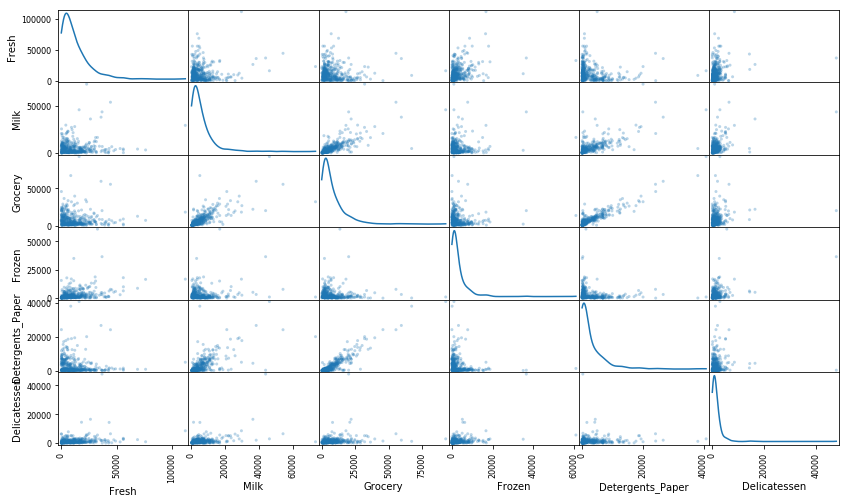

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
* The scatter matrix demonstrates, as suggested in the answer to the Q2, that the features are not highly correlated. We can see some correlation between 'Detergents_Paper' and 'Grocery' and 'Milk', but that is really it.
* We can see when the martix is displaying results from the same feature that a) the data is not normally distributed but is skewed with a long tail to the right. We can also see that b) most values are in the lower range for each feature. All features have a starting value about 3/4 up a normal distribution, the distribution then peaks almost immediately, drops away steeply and continues with the aforementioned long tail.
* This distribution is reflected in the other cells, where the matrix shows feature pairs; that is, there is a clumping in the lower left of the graph as the values for each pair are closer to zero than to values further up the distribution.
* The correlation plot below shows limited correlation between all the categories, except for 'Grocery' and 'Detergents Paper', which shows quite a strong positive correlation of $+0.925$. Given that uncorrelated data has more predictive power, this is potentially positive. 

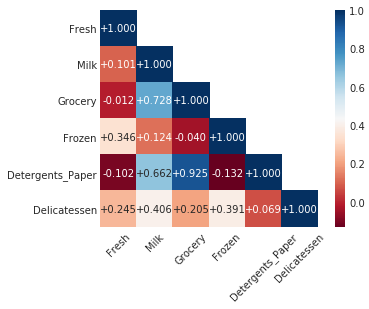

In [12]:
import matplotlib.pyplot as plt

corr = data.corr()
mask = np.zeros_like(corr)                          # Returns array of zeros with same shape and type as corr
mask[np.triu_indices_from(mask, 1)] = True          # Return the indices for the upper-triangle of arr, 1 means we include '+1.00' boxes
with sns.axes_style("white"):                       # If mask passed data not shown in cells where mask is True
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, 
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

**Understand the distribution of the data before the log_transformation**
* Shows that the data most of the features are log-normal - they have a distribution such that their logarithm has a normal distribution. 
* Suggests we can achieve a normal distribution for our data simply by taking the logarithm of the data.

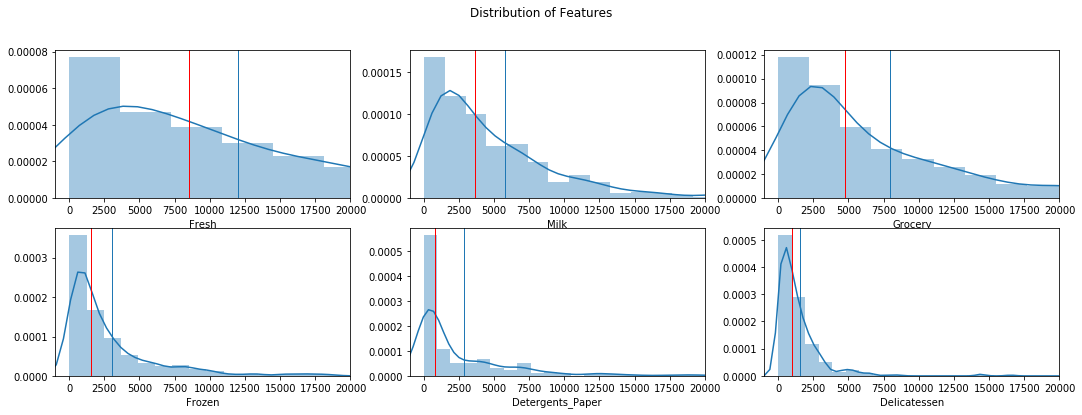

In [13]:
# plot distrubtion plot on data
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

/Users/drh/anaconda/envs/MLND/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


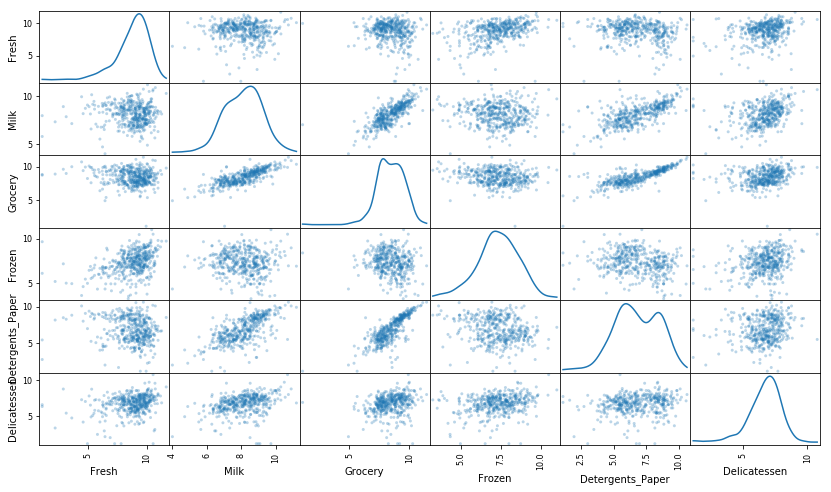

In [15]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

**Understand the distribution of the data after the log_transformation**

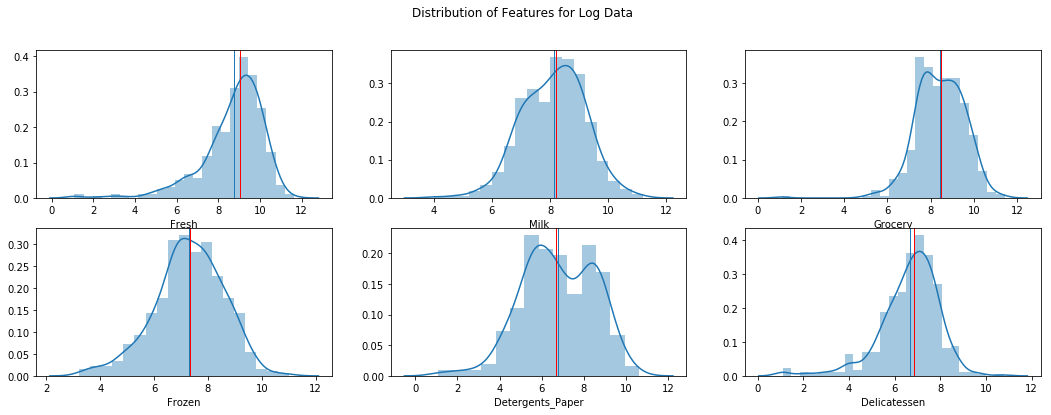

In [16]:
# plot distribution of log_transformed data
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

**Comparing the distributions of the log_transformed features**

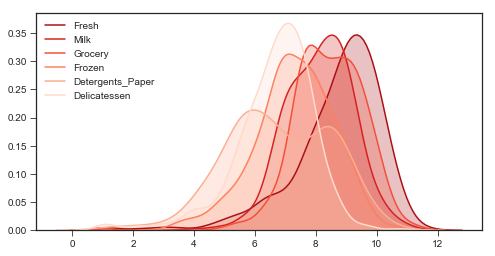

In [17]:
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [18]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
1,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
2,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [28]:
# For each feature find the data points with extreme high or low values

outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
#    print Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
#    print Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
#    print step

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove

#for feature in log_data.keys():
    remove_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers.extend(remove_data.index.values)
#    print outliers 

    from collections import Counter    

    outlier_update = []
    for k, v in Counter(outliers).viewitems():
        if v >= 2:           
            outlier_update.append(k) 

print "The following indices are outliers in 2 or more categories {}:".format(outlier_update)
        
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outlier_update]).reset_index(drop = True)
# good_data.shape

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The following indices are outliers in 2 or more categories [128, 154, 65, 66, 75]:


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
* There were a number of data points that had at least one outlier in them, but to remove all these point would be to remove c. 10% of the dataset. This almost suggests that our definition of outlier is too restricted if it results in so many outliers.

*Review: You'll also have to talk more about why you chose to remove these outliers*
* We could therefore change the definition, or *we can remove only those outliers should an index occur more than once* (i.e. it has a value in more than one feature that is an outlier). This results in only 5 values being removed, which are: $128, 154, 65, 66, 75.$   

*Review: What effect might having outliers in our data have on our models?*
* The table below dispaly the log_data properties for the selected outliers to be removed. 
* Removing the outliers will change our understanding of how the remaining data relates to each other. The population distribution will compress, the mean values will be lower, as will the standard deviation.
* Where we to keep the outliers in, we might cluster our data around the characteristics that weren't necessarily appropriate for the population of data we are considering; in effect, the outcomes would be skewed by incorrect data points. 
* However, we should be cautious removing outliers to make our data set 'neater'; tails of distributions can be a valid part of the data and removing their might only remove from our visibility a potentially informative data point. In this case, we might remove some high spending accounts that account for significant amounts of spend, resulting in the development of strategies that don't take into consideration these important customers.

In [37]:
# display(log_data([128]))#, 154, 65, 66, 75]))

indices = [128, 154, 65, 66, 75]
removed_outliers = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "The outliers to be removed have the following log_data properties:"
display(removed_outliers)

The outliers to be removed have the following log_data properties:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
1,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
3,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
4,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

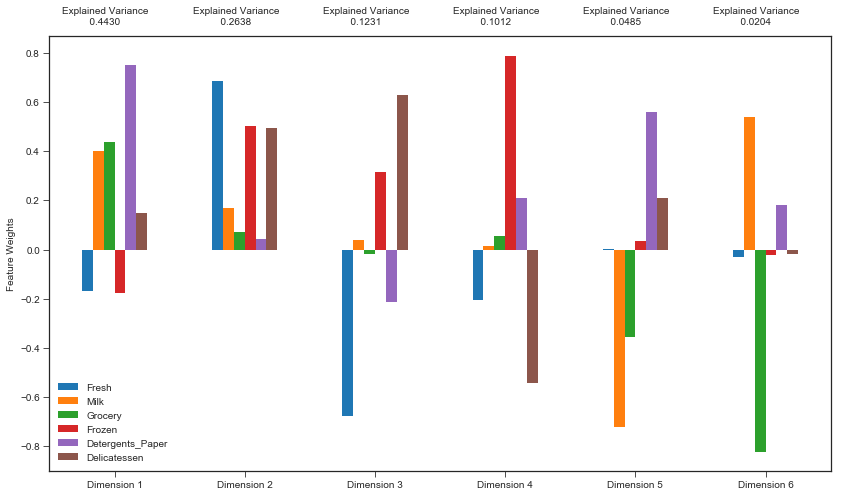

In [18]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

*How much variance in the data is explained* ***in total*** *by the first and second principal component?*
* Each dimension is a principle component of the data. The first principle component contains the largest variance, which means that it contains the largest amount of information (we have plotted a line across the 6 dimensions that best captures the information in those 6 dimensions).
* We can explain $0.7068$ variance in data with the first two components. 
* $0.4430$ variance is explained by the first dimension, over 40% of the initial variance. In this dimension, 'Detergrents_Paper' provides the most variance, and therefore the most information about what differentiates customer spending. 'Milk' and 'Grocery' also contributes to the variance. This suggests that if we can understand what customer types are driving this variance, then we will be able to start to understand patterns of purchasing that allow us to segment them. 
* $0.2638$ variance is explained by the second dimension. We can see that this is driven by 'Fresh', 'Frozen' and 'Delicatessen', three different spend categories to the above. This offers the potential to further understand customer segments by refining any categorisation made using the spend categories above, with the spend categories in this dimension. 

*What about the first four principal components?* 
* This increases to *.9311* for the first four dimensions. 
* $0.1231$ variance is explained by the third dimension. $0.1012$ variance is explained by the fourth dimension. Here we start to see more prominent negative weighting of variables in these dimensions. 'Fresh' does not contribute to our understanding of variability in the third dimension by a factor of $-0.625$ and the same is true of 'Delicatessen' in the fourth dimension. 
* This trend continues and starts to show that the number of data variables that can inform us reduces as we go through the dimensions. It says that the data gets less and less informative as we mine it and get through the most informative variabes of the data.   

*Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*
* The first four principal components represent information from all the features, but to varying degrees. On the first principle component, which contains the most variance and therefore information, captures 'Grocery', 'Milk' and 'Detergents_Paper variance. Some features have a lot of positive variance ('Frozen', 'Delicatessen' in particular) over the first four dimensions, but others have negative variance that cobalances out the positive variance ('Fresh').
* Once we get to the fifth and sixth dimensions, the variance is split positively and negatively and overall information gain is limited. This is not surprising, intuitively I think that using PCA with the same number of dimensions as the features would overall lead to the same sort of information gain as contained in the normalised data set. 
* The benefit is in reducing dimensionality, perhaps down to 4, or even to 1 or 2 dimensions. Exactly how many dimensions will depend on the data we are analysing, the methods we are using and the results we expect.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-6.6170,-6.5320,-1.3364,-0.6495,0.4424,0.0146
1,-8.3026,0.4747,0.9774,-1.1195,0.2977,4.3514
2,2.1899,4.8605,0.0008,0.4827,-0.5041,0.1988


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [30]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# reduced_data

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [31]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-6.6170,-6.5320
1,-8.3026,0.4747
2,2.1899,4.8605


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

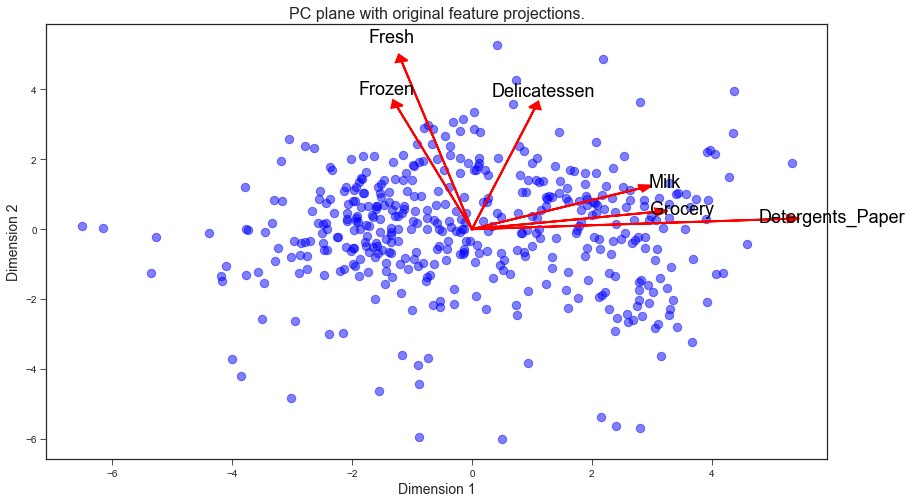

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means clustering**

* K-Means Clustering is used to specify the number (k) of clusters we want to find. The way the algorithm is implemented, the centre point of the cluster pulls in the data points around it such that any given data point will get assigned only to the cluster closest to it.
* Its advanages are that is is quick and easy to implement and that the results are easy to interpret. 


**Gaussian Mixture Model**

* GMM is an example of *soft clustering*, which allows for the possibility that points can be shared between clusters. We use probability theory to determine whether a point can be probabilistically from one or more set of clusters.
* Gaussian Mixture Models can be used to implement *Expectation Maximisation* and *Bayesian Mixture Models.* 
* Expectation Maximisation focuses on the likelihood that a data point belongs to a specific cluster and assigns it to the most likely cluster. As it maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
* GMM/EM is therefore more flexible in terms of cluster covariance than K-Means clustering and data point can be assigned in more unconstrained ways and not simply due to its proximity to the cluster centre.


**Algorithm selection**

* I think the GMM/EM algorithm is best suited for this dataset. I think clustering around a centre point may reduce the flexibility required by the algorithm to find appropriate clusters across this data, which has highly varied values for each of the features.    

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2)
clusterer = clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
score

0.41181886438624477

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

A selection of the cluster numbers I tried is below:

* 2: 0.41181886438624477
* 3: 0.37356074717499449
* 4: 0.33203700182792784
* 5: 0.28098340705057739
* 10: 0.30293942568140581
* 20: 0.1969985942170594


We can see that the score reduces as we move past 2 clusters, and therefore I have kept the number of clusters to 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

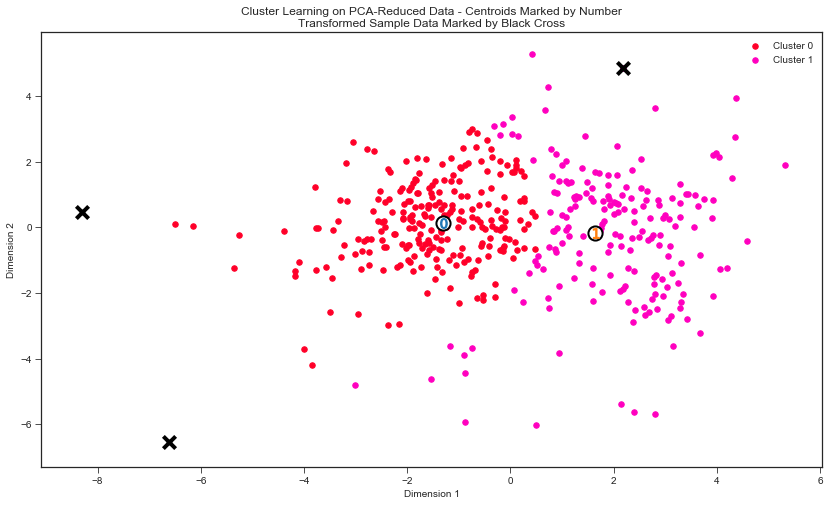

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [27]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

*Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project.*
*  To help answer this question, the heatmap above shows how far from the statistical norm, in terms of standard deviation, the true centres of the cluster are. I have also recalculated the mean and max values for each product category.
* We can see that the centre_point for *Segment 0* is below the mean for all product categories, sometimes significantly (for example 'Milk', 'Grocery', and 'Detergents_Fresh' are all about half a standard deviation below the mean value). This means that establishments in *Segment 0* typically spend less than the mean average across all product ranges.    
* We can see that the centre_point for *Segment 1* is locataed more around the mean for the product categories, though we should not that 'Frozen' and 'Fresh' are noticeably below average. This means that spend establishments in *Segment 1* is somewhat average across all product ranges.  

*What set of establishments could each of the customer segments represent?*
* I would see *Segement 1* as being composed of establishments that represent the average sort of establishment for supplies of these products, such as supermarkets. Spend is average or better than average in most categories. 
* *Segment 0* has larger spend in the 'Fresh' category that could indicate that they represent smaller market-style supermarkets, or cafes. 
* However, given that we have only two clusters, and given the statistical description of each segment, both of these could represent a broad range of establishments.'Delicatessen' spend is similar in both segments, and 'Frozen' spend is actually higher in *Segement 0* than *Segment 1* which I would not have expected given the conclusions above. This therefore points to other types of splits in the segments that are still hard to determine given the analysis. 

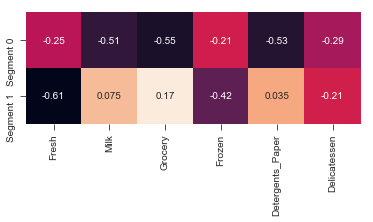

In [29]:
# plotting the normalized cluster expenditures

sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [39]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [40]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,622,55,137,75,7,8
1,20398,1137,3,4407,3,975
2,112151,29627,18148,16745,4948,8550


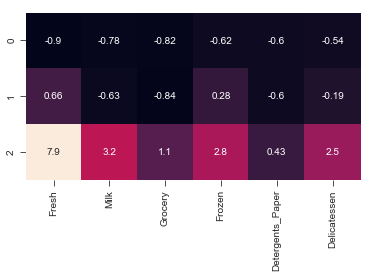

In [44]:
sns.heatmap((samples-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)

**Answer:**

* Looking again at the values for each sample point and a heatmap of how these values compare to the mean centre point of the data, we can see that:
    * *Sample 1* is predicted to be in Cluster 0, and this seems consistent with the fact that the values in both this sample and the cluster are below the mean values for the data;
    * *Samples 2* is predicted to be in Cluster 1, and this seems somewhat consistent with the fact that the values in both this sample are above the mean values for the data, even though this is to a greater degree than in the overall cluster;
    * *Sample 0* is predicted to be in Cluster 1, and this seems *in*consistent with the statistical description of the values as shown in the two heatmaps - both the sample and the cluster have values that are below the mean values of the overall data. 
        * This might require further investigation to see if the data has been mis-classified or it could be that more digging in the data is required to really understand the assumptions underpinning the classifications.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

*How an A/B test can be performed on customers after a change in the wholesale distributor’s service. Can we assume the change affects all customers equally?*
* From our analysis, our customer data can be segmented into two groups, each with the different characteristics discussed above. We cannot assume the changes will affect all customers equally and therefore need to run an A/B test.
* An A/B test is a controlled experiment with two variants, A and B, with the aim of identifying whether changes from the current environment (in our case, this is the current level of service offered to customers) have a positive or negative impact. We achieve by splitting the target population into two groups, group A (which is a control group and is tested on the existing service), and group B (which is the test group subjected to a change in the environment).
* Using our knowledge of the clusters and of A/B testing, we want to determine which customers, if any, would react positively to any changes in delivery service, *by cluster.* As we have seen, this means:
    * Segmenting our customers, as we have done;
    * Dividing each segment into an A and B group;
    * Continuing the 5 day a week delivery service for population A, and changing to a 3 day a week delivery service for population B;
    * Running the A/B test is conditions that make the test valid, and measuring it in such a way as to make the results meaningful and able to provide direction as to whether and how to change the delivery service.

*How can we determine which group of customers it affects the most?* 

* We would need to ensure the results from the A/B test are legitimate, and that the A/B test addresses such concerns as:  
    * *Representatively constructed populations* for the test. Clearly both A/B groups need to be from the same cluster. If we only perform the service change on a subset of the population, we need to be careful about comparing results, given that the population sizes of group A and B are different.  We also need to be rigorous in dividing the populations as we should recognise that the segments are quite broad and the changes may get different responses depending on the sub-segment of the population. 
    * *Other Effects*, such as accounting for the days of the week on which the service is delivered (and potentially altering this to compare), or accounting for initial resistance (or happiness) because of the change that may alter over time. This means understanding and interpreting results can get quite complicated. 
    * *Getting the right value measures*, such that we can determine whether the changes are good for the business. This might be that orders remain the same (but costs go down); orders improve; customer satisfaction measures improve, if such a baseline measure exists; etc. Whatever the measure, it needs to be appropriate to the business and the strategy it is pursuing. 


* Some factors that might influence how well the A/B test goes are:  
    * size of spend (those who spend more will likely be ordering more goods, suggesting that they will need to have access to deliveries over the course of the week)
    * perishable or non-perishable goods (those customers with higher spend in 'Fresh' and 'Delicatessen' are likely to need to retain the 5-day service as their products will need to remain fresh to sell, whereas 'Frozen', 'Grocery' and 'Detergents_Paper' could be longer lasting)


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* Now that we have clustered the datapoints, we have created a set of labelled data that can be fed in to a supervised learning algorithm. The segments represent the labels and therefore the target variable, and the spend in each category represents the features.
* We could use something like *K Nearest Neighbour* to put new data in its appropriate cluster, but other supervised learning algorithms could be tried to see which one best classifies the data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

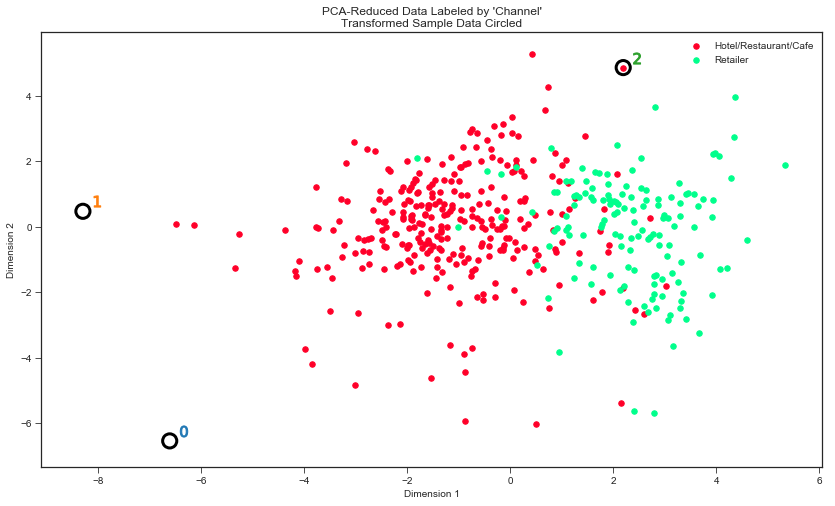

In [45]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outlier_update, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
* These classifications are consistent with my segmentation and the underpinning analysis. I had thought that *segment 1* had more retailers in, and this matches the 'Retailer' category here. I also thought that *segment 0* had more cafes and such operations, and this turns out to tbe the case.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.